In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting library
%matplotlib inline
from keras.models import Sequential
from keras.layers import Flatten, Dense , Activation, Dropout
from keras.optimizers import SGD

In [2]:
from keras.datasets import mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [110]:
num_labels = len(np.unique(y_train))
print(num_labels)

10


In [111]:
from keras.utils import to_categorical

In [112]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [113]:
hidden_units = 512
dropout = 0.2

In [76]:
from keras.models import Sequential

model = Sequential()

In [114]:
x_train.shape

(60000, 28, 28)

In [115]:
image_size = x_train.shape[1]
image_size
input_size = image_size * image_size
input_size

784

In [116]:
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [117]:
x_train, x_test = x_train / 255.0, x_test / 255.0

# using auto keras

In [83]:
model = Sequential()
model.add(Flatten(input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [84]:
history=model.compile(loss='categorical_crossentropy', 
              optimizer='SGD',
              metrics=['accuracy'])

In [85]:
history=model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2995 - accuracy: 0.1126
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2988 - accuracy: 0.1124
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2982 - accuracy: 0.1124
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2977 - accuracy: 0.1124
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2972 - accuracy: 0.1124
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2966 - accuracy: 0.1148
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2960 - accuracy: 0.1124
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2954 - accuracy: 0.1124
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2948 - accuracy: 0.1126
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.294

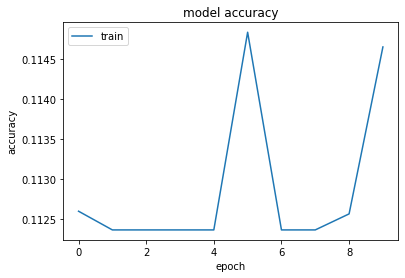

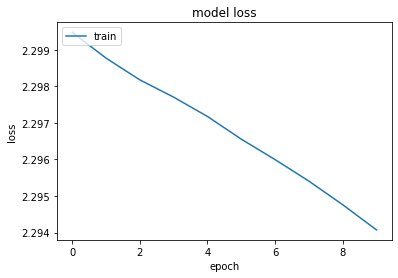

In [86]:
plt.plot(history.history['accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# using tensorflow

In [127]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [128]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [129]:
import tensorflow as tf

In [130]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
 
])

In [131]:
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Tensorboard to get the graphical accuray/loss plot

In [132]:
tf_callbacks = tf.keras.callbacks.TensorBoard(log_dir = "logs/fit" , histogram_freq = 1)

In [133]:
model.fit(x_train, y_train, epochs=10, callbacks = tf_callbacks)


Epoch 1/10


ValueError: in user code:

    File "C:\Users\Admin\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Admin\anaconda3\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Admin\anaconda3\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Admin\anaconda3\lib\site-packages\keras\engine\training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\Admin\anaconda3\lib\site-packages\keras\engine\training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "C:\Users\Admin\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Admin\anaconda3\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\Admin\anaconda3\lib\site-packages\keras\losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Admin\anaconda3\lib\site-packages\keras\losses.py", line 2098, in sparse_categorical_crossentropy
        return backend.sparse_categorical_crossentropy(
    File "C:\Users\Admin\anaconda3\lib\site-packages\keras\backend.py", line 5633, in sparse_categorical_crossentropy
        res = tf.nn.sparse_softmax_cross_entropy_with_logits(

    ValueError: `labels.shape` must equal `logits.shape` except for the last dimension. Received: labels.shape=(320,) and logits.shape=(32, 10)


In [90]:
pip install tensorboard

Note: you may need to restart the kernel to use updated packages.


In [29]:
%load_ext tensorboard

In [30]:
tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 2260), started 14 days, 23:54:20 ago. (Use '!kill 2260' to kill it.)

In [ ]:
model.evaluate()